In [1]:
# uses conditional probability

In [3]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [47]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [49]:
X=df['v2']
y=df['v1']

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
import re
X.apply(lambda x:re.sub('/[^a-zA-Z0-9]/',' ',x))

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [60]:
stemmer=PorterStemmer()

def preprocess(text):
    text=re.sub('[^a-zA-Z0-9]',' ',text)
    text=text.lower()
    return " ".join([stemmer.stem(word) for word in word_tokenize(text) if word not in stopwords.words('english')])
    
    

In [64]:
X=X.apply(preprocess)

In [66]:
y=y.map({'ham':1,'spam':0})

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_train_vec=cv.fit_transform(X_train)
X_test_vec=cv.transform(X_test)

In [75]:
model=MultinomialNB()
model.fit(X_train_vec,y_train)

MultinomialNB()

In [77]:
ypred=model.predict(X_test_vec)

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,ypred)

0.9829596412556054

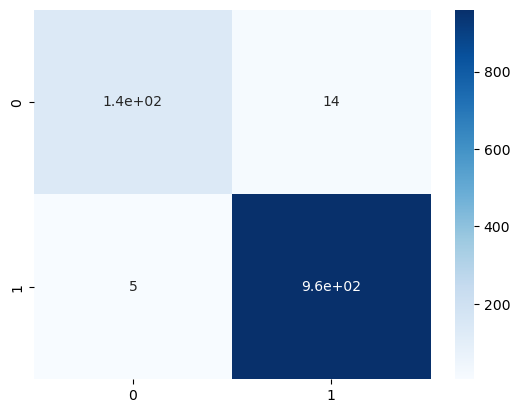

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test,ypred),annot=True,cmap='Blues')
plt.show()